<a href="https://colab.research.google.com/github/rskadikar/TAC359_HW1/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/40


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1212/1212 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 246.8329 - mean_squared_error: 246.8329 - val_loss: 35.9333 - val_mean_squared_error: 35.9333
Epoch 2/40
1212/1212 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 38.2915 - mean_squared_error: 38.2915 - val_loss: 43.7440 - val_mean_squared_error: 43.7440
Epoch 3/40
1212/1212 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 60.8158 - mean_squared_error: 60.8158 - val_loss: 34.2297 - val_mean_squared_error: 34.2297
Epoch 4/40
1212/1212 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 34.1901 - mean_squared_error: 34.1901 - val_loss: 34.7022 - val_mean_squared_error: 34.7022
Epoch 5/40
1212/1212 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 31.4130 - mean_squared_error: 31.4130 - val_loss: 34.1494 - val_mean_squared_error: 34.1494
Epoch 6/40
1212/1212 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 27.4639 - mean_squared_error: 27.4639 - val_loss: 32.6039 - val_mean_squared_error: 32.6039
Epoch 7/40
1212/1212 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 26.9828 - mean_squared_

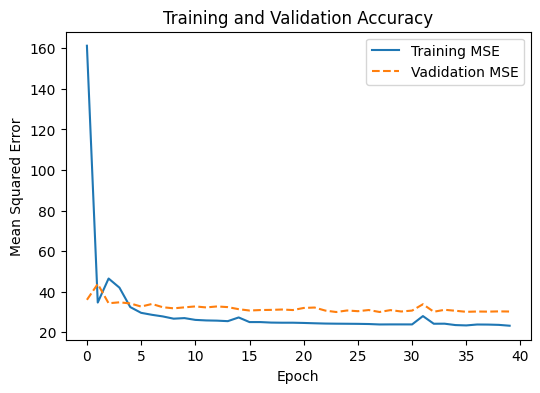

520/520 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
R-squared: 0.6938397855931107
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Prediction for 2 passengers on a Friday at 3:20 pm for 3.2 miles: [[47.734924]]


In [ ]:
from tensorflow import keras
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# 1. Read the dataset & parse pickup_datetime so it's read as a timestamp
df_taxi = pd.read_csv('taxifares.csv')
df_taxi["pickup_datetime"] = pd.to_datetime(df_taxi["pickup_datetime"])

# 2. target variable: fare_amount

# 3. drop variables
df_taxi.drop(columns=["key"], inplace = True)

# 4. extract weekday & time. drop pickup_datetime
df_taxi["weekday"] = df_taxi["pickup_datetime"].dt.day_name()
df_taxi = pd.get_dummies(df_taxi, columns = ["weekday"])
df_taxi["hour"] = df_taxi["pickup_datetime"].dt.hour
df_taxi["minute"] = df_taxi["pickup_datetime"].dt.minute
df_taxi.drop(columns=["pickup_datetime"], inplace = True)

# 5. compute distance between pickup_longitude & dropoff_longitude
a = (df_taxi["dropoff_longitude"] - df_taxi["pickup_longitude"]) * 54.6
b = (df_taxi["dropoff_latitude"] - df_taxi["pickup_latitude"]) * 69
df_taxi["distance"] = np.sqrt(a**2 + b**2)

# 6. drop latitude & longitude
df_taxi.drop(columns = ["pickup_latitude", "pickup_longitude", "dropoff_longitude", "dropoff_latitude"], inplace = True)

# 7. assign X & y
X = df_taxi.drop(columns = ["fare_amount"])
y = df_taxi["fare_amount"]

# 8. build keras model
model = Sequential()
model.add(Dense(units = 100, activation = "relu", input_dim = X.shape[1]))
model.add(Dense(units = 75, activation = "relu"))

# 9. add a dense output layer
model.add(Dense(units = 1, activation = "linear"))

# 10. compile the model with optimizer as adam, loss as MSE, metrics as MSE
model.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["mean_squared_error"])

# 11. train the model. partition with a split of 70/30. epochs > 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
history = model.fit(X_train, y_train, epochs = 40, validation_data = (X_test, y_test))

# 12. display the plot of training and validation accuracy vs. epoch
plt.figure(figsize = [6, 4])
plt.plot(history.history['mean_squared_error'], label = 'Training MSE')
plt.plot(history.history['val_mean_squared_error'], label = 'Vadidation MSE', linestyle = "--")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# 13. print r-squared score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# 14. print prediction of taxi fare
data = pd.DataFrame({'passenger_count': [2], 'hour': [15], 'minute': [20], 'distance': [3.2], 'weekday_Monday': [0], 'weekday_Saturday': [0], 'weekday_Sunday': [0], 'weekday_Thursday': [0], 'weekday_Tuesday': [0], 'weekday_Wednesday': [0], 'weekday_Friday': [1]})
pred = model.predict(data)
print(f"Prediction for 2 passengers on a Friday at 3:20 pm for 3.2 miles:", pred)






